In [1]:
%matplotlib inline

import numpy as np
from numpy import linalg as nla
import scipy as sp
from scipy import linalg as sla
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from pprint import pprint
from time import time
import SHFunctions as shf
import os

from jupyterthemes import jtplot
jtplot.style(theme='solarizedl')

from IPython.core.display import display, HTML
np.set_printoptions(linewidth = 270)

In [2]:
A = shf.MakeGenSingA(5, 2, delta = .50000)
A

array([[[ 0.        ,  0.03705976,  0.01639762,  0.06090592,  0.05230336],
        [ 0.02802389,  0.        ,  0.02518048,  0.06017112,  0.05329118],
        [ 0.05153179,  0.05322422,  0.        ,  0.00631174,  0.05559891],
        [ 0.06129499,  0.05865632,  0.03713087,  0.        ,  0.00958449],
        [ 0.0236543 ,  0.00115266,  0.11686259,  0.02499712,  0.        ]],

       [[-1.        ,  0.05724919,  0.00616879,  0.05607812,  0.04717056],
        [ 0.05846237, -1.        ,  0.03334523,  0.03882108,  0.03603799],
        [ 0.04673482,  0.06219879, -1.        ,  0.04889774,  0.00883532],
        [ 0.05721813,  0.02437821,  0.05951973, -1.        ,  0.02555061],
        [ 0.00323679,  0.03459063,  0.08568002,  0.04315922, -1.        ]],

       [[ 0.5       ,  0.05149334,  0.06410934,  0.01736263,  0.03370136],
        [ 0.0293722 ,  0.5       ,  0.04120258,  0.03506751,  0.06102438],
        [ 0.06087523,  0.05258692,  0.5       ,  0.05174084,  0.00146367],
        [ 0.06410827,

[[0.01816894 0.05102755 0.03888615 0.07483737 0.06708   ]
 [0.04449072 0.01695151 0.04518152 0.0740106  0.06936566]
 [0.06659875 0.06687893 0.01925469 0.02417131 0.07309632]
 [0.07615981 0.07385533 0.05322853 0.01701498 0.02974135]
 [0.04317809 0.01977759 0.12980787 0.0372631  0.01997335]]


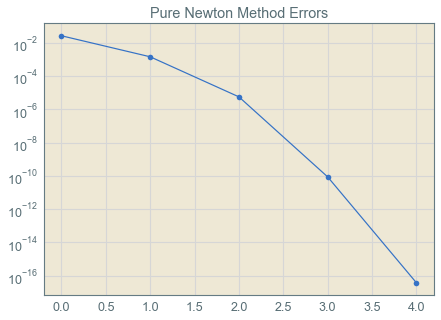

In [3]:
Ss = shf.NewtonPoly(A)
# ss = shf.SimpNewtonPoly(A)
# Ss = shf.NewtonPoly(A, X0 = np.array([[0, 1, 0],[0, 0, 1],[0, 0, 0]]))
# Ss = shf.NewtonPoly(A, X0 = 1 * np.eye(3))
fig = plt.figure(figsize=(7,5))
ax1 = fig.add_subplot(111)

ax1.semilogy(Ss['errs'],'-o')
ax1.set_title('Pure Newton Method Errors')

print(Ss['sol'])

### (Ordered) Eigenvalues of $-P'_{X_{i}}$'s 

In [4]:
# Derivative에 대한 eigenvalues와 vectors
Ds = []
EVs = []
for i in range(len(Ss['P_Xs'])):
    d, ev = nla.eig(-Ss['P_Xs'][i])
    Ds.append(d)
    EVs.append(ev)
min_i = np.argmin(np.abs(Ds[-1]))
# for i in range(len(Ds)):
#     print('{}-th : {}'.format(i, Ds[i]))
# print(EVs)

In [5]:
dss = np.zeros((Ds[-1].shape[0],len(Ds)))
dss = dss.astype(complex)
for i in range(len(EVs)):
    dss[:,i] = np.squeeze(Ds[i])
dss.sort(0) # Ordering

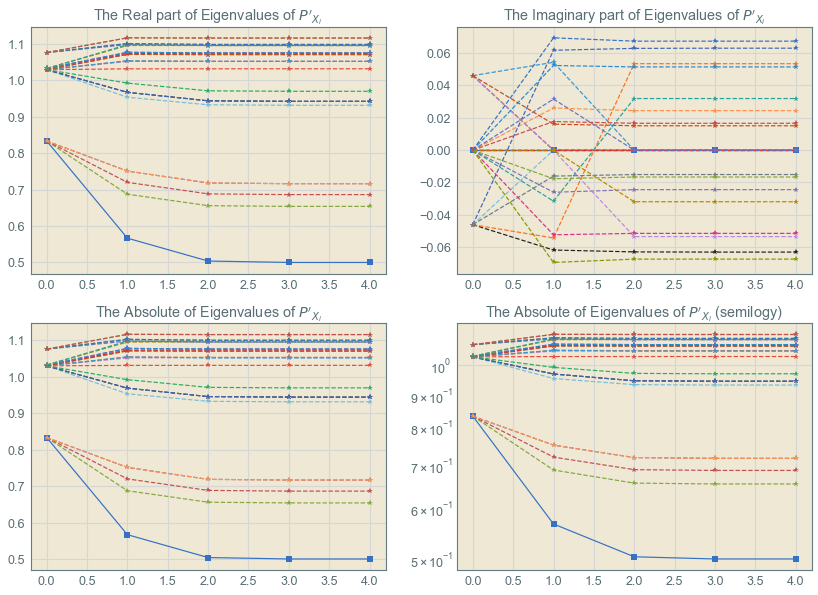

In [6]:
fig = plt.figure(figsize=(14,10))
ax1 = fig.add_subplot(221)
ax1.set_title("The Real part of Eigenvalues of $P'_{X_{i}}$")

ax2 = fig.add_subplot(222)
ax2.set_title("The Imaginary part of Eigenvalues of $P'_{X_{i}}$")

ax3 = fig.add_subplot(223)
ax3.set_title("The Absolute of Eigenvalues of $P'_{X_{i}}$")

ax4 = fig.add_subplot(224)
ax4.set_title("The Absolute of Eigenvalues of $P'_{X_{i}}$ (semilogy)")

for i in range(dss.shape[0]):
    if i == min_i:
        ax1.plot(np.real(dss[i,:]),'-s')
        ax2.plot(np.imag(dss[i,:]),'-s')
        ax3.plot(np.abs(dss[i,:]),'-s')
        ax4.semilogy(np.abs(dss[i,:]),'-s')
    else:
        ax1.plot(np.real(dss[i,:]),'--*')
        ax2.plot(np.imag(dss[i,:]),'--*')
        ax3.plot(np.abs(dss[i,:]),'--*')
        ax4.semilogy(np.abs(dss[i,:]),'--*')

### Coefficients of Eigenvectors of $P'_{S}$ with respect to $H_{i}$

In [7]:
coeffi = np.zeros((Ss['Hs'][0].shape[0] * Ss['Hs'][0].shape[1],len(EVs)))
coeffi = coeffi.astype(complex)
for i in range(len(EVs)):
    h = nla.solve(EVs[-1], np.reshape(Ss['Hs'][i], (Ss['Hs'][i].shape[0] * Ss['Hs'][i].shape[1],1), order='F'))
    coeffi[:,i] = np.squeeze(h)
# coeffi.transpose()

cosine = np.zeros(len(EVs))
for i in range(len(EVs)):
    hi, hs = np.reshape(Ss['Hs'][i], (Ss['Hs'][i].shape[0] * Ss['Hs'][i].shape[1], ), order='F'), np.reshape(Ss['Hs'][-1], (Ss['Hs'][-1].shape[0] * Ss['Hs'][-1].shape[1], ), order='F')
    c = np.dot(hi, hs)/(nla.norm(hi,2) * nla.norm(hs,2))
    cosine[i] = c

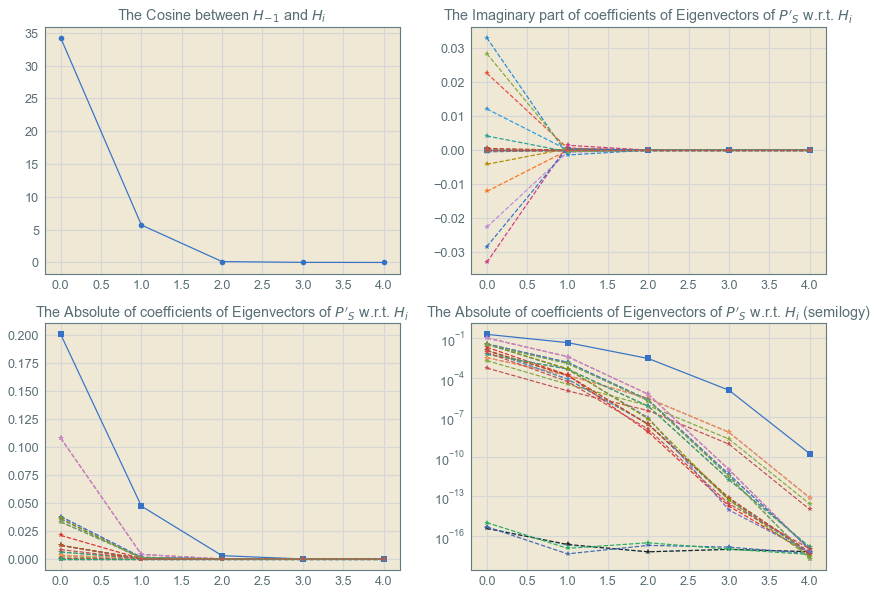

In [8]:
fig = plt.figure(figsize=(14,10))
ax1 = fig.add_subplot(221)
ax1.set_title("The Cosine between $H_{-1}$ and $H_{i}$")

ax2 = fig.add_subplot(222)
ax2.set_title("The Imaginary part of coefficients of Eigenvectors of $P'_{S}$ w.r.t. $H_{i}$")

ax3 = fig.add_subplot(223)
ax3.set_title("The Absolute of coefficients of Eigenvectors of $P'_{S}$ w.r.t. $H_{i}$")
# ax3.set_ylim([-.00001, .00101])

ax4 = fig.add_subplot(224)
ax4.set_title("The Absolute of coefficients of Eigenvectors of $P'_{S}$ w.r.t. $H_{i}$ (semilogy)")

ax1.plot(np.arccos(cosine)*180/np.pi,'-o')
for i in range(coeffi.shape[0]):
    if i == min_i:
        ax2.plot(np.imag(coeffi[i,:]),'-s')
        ax3.plot(np.abs(coeffi[i,:]),'-s')
        ax4.semilogy(np.abs(coeffi[i,:]),'-s')
    else:
        ax2.plot(np.imag(coeffi[i,:]),'--*')
        ax3.plot(np.abs(coeffi[i,:]),'--*')
        ax4.semilogy(np.abs(coeffi[i,:]),'--*')

In [9]:
print(min_i)
print(Ds[-1][0])
print(np.real(EVs[-1][:,0]))
print(np.imag(EVs[-1][:,0]))
print(coeffi)

0
(0.5000000002328306+0j)
[-0.19808821 -0.19808821 -0.19808821 -0.19808821 -0.19808821 -0.18305606 -0.18305606 -0.18305606 -0.18305606 -0.18305606 -0.22771859 -0.22771859 -0.22771859 -0.22771859 -0.22771859 -0.17874065 -0.17874065 -0.17874065 -0.17874065 -0.17874065 -0.2084408  -0.2084408
 -0.2084408  -0.2084408  -0.2084408 ]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[[ 2.00794281e-01+4.28956754e-18j  4.72457133e-02+3.54802352e-18j  2.94136736e-03-1.83693552e-21j  1.14895410e-05+1.39980994e-24j  1.75316494e-10+8.66047999e-31j]
 [-2.03424229e-03-3.90526949e-17j -3.25532206e-05+1.68557379e-18j -7.58014375e-07-4.99822616e-22j -2.25825702e-09+2.54316455e-24j -2.63707400e-14+0.00000000e+00j]
 [ 5.55191160e-04-2.01452220e-17j -1.03359233e-05-3.08676788e-18j -3.20984957e-07+9.51922660e-22j -9.16509297e-10-0.00000000e+00j -1.01814683e-14-0.00000000e+00j]
 [ 3.39183752e-03+3.34276324e-04j -1.48205722e-04-4.34910570e-05j -2.72583576e-06-3.91617400e-07j -7.29689